In [39]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [54]:
# Importing Data
data = pd.read_excel("E:/Programming/MLMomeni/ML/files/Superstore.xlsx")
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,price,Quantity,Discount,Profit,sales,Datediff
0,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Chuck Clark,Home Office,United States,Columbus,Indiana,Central,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.300,2,0.0,56.5110,418.600,0
1,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,East,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.136,4,0.2,12.1176,1292.544,0
2,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,East,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279,636.510,0
3,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,East,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910,158.328,0
4,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,West,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,27.808,0


In [55]:
# Extracting desired features
df = data[['Order Date', 'sales']].copy()

In [56]:
# Removing days
df['Order Date'] = df['Order Date'].astype(str).str[:-3].astype(object)

In [57]:
# Groupby month
df = df.groupby('Order Date')['sales'].sum()

In [58]:
df = pd.DataFrame(df)
df.head()

,sales
Order Date,
2014-01,73744.125
2014-02,19603.208
2014-03,292309.553
2014-04,146422.997
2014-05,117540.559


In [60]:
# Extracting sales values
y = df['sales'].values.astype(float)
y = pd.DataFrame(y)

In [61]:
order = (1,1,1)        # ARIMA part
seasonal_order = (1,1,1,12)  # SARIMA part with yearly seasonality

model = SARIMAX(y, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  0   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -268.049
Date:                            Wed, 10 Sep 2025   AIC                            546.098
Time:                                    19:43:08   BIC                            551.321
Sample:                                         0   HQIC                           547.232
                                             - 48                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0183      0.337     -0.054      0.957      -0.679       0.642
ma.L1         -0.9968      0.020   

D:\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


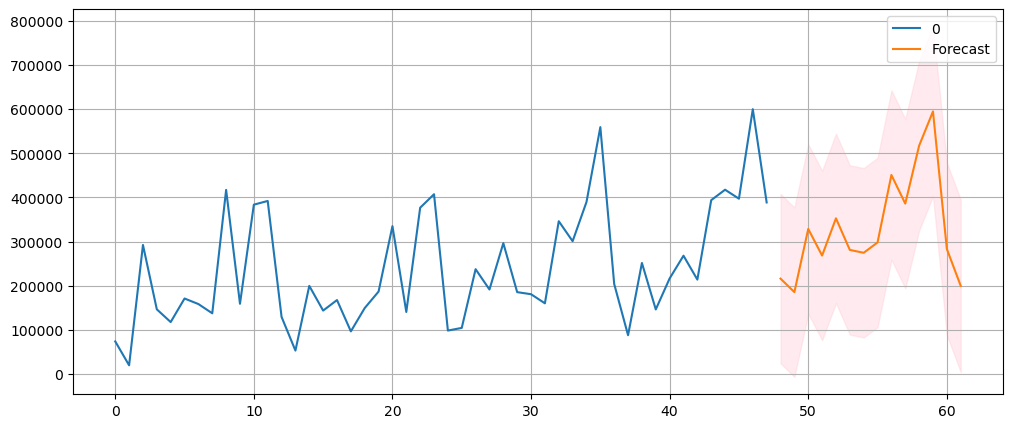

In [62]:
n_forecast = 14  # forecast 12 months ahead
forecast = results.get_forecast(steps=n_forecast)
forecast_ci = forecast.conf_int()

ax = y.plot(label='Observed', figsize=(12,5))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.grid()
plt.legend()
plt.show()

In [63]:
predicted_values = forecast.predicted_mean
print(predicted_values)

48    216056.584585
49    185465.059350
50    328570.175378
51    268263.501271
52    352669.168515
53    281087.977009
54    274559.231368
55    297986.701800
56    450886.991888
57    386053.178063
58    517291.856513
59    594916.630587
60    283271.548149
61    199772.782245
Name: predicted_mean, dtype: float64


In [64]:
forecast_ci = forecast.conf_int()
forecast_ci

,lower y,upper y
48,24164.980893,407948.188277
49,-6432.187772,377362.306472
50,136671.287589,520469.063168
51,76363.487867,460163.514675
52,160768.019035,544570.317995
53,89185.690357,472990.263661
54,82655.806218,466462.656517
55,106082.136774,489891.266827
56,258981.285548,642792.698227
57,194146.328917,577960.027209


In [65]:
# Build a DataFrame for forecast
df_forecast = pd.DataFrame({
    "date": forecast.predicted_mean.index,
    "Forecast": forecast.predicted_mean.values,
    "Lower_CI": forecast_ci.iloc[:, 0].values,
    "Upper_CI": forecast_ci.iloc[:, 1].values
})

df_forecast = df_forecast.set_index("date")


In [66]:
df_forecast

,Forecast,Lower_CI,Upper_CI
date,,,
48,216056.584585,24164.980893,407948.188277
49,185465.059350,-6432.187772,377362.306472
50,328570.175378,136671.287589,520469.063168
51,268263.501271,76363.487867,460163.514675
52,352669.168515,160768.019035,544570.317995
53,281087.977009,89185.690357,472990.263661
54,274559.231368,82655.806218,466462.656517
55,297986.701800,106082.136774,489891.266827
56,450886.991888,258981.285548,642792.698227


In [38]:
#Save final dataframes to an excel file
OUTPUT_XLSX = "forecast.xlsx"
with pd.ExcelWriter(OUTPUT_XLSX, engine="openpyxl") as writer:
    df_forecast.to_excel(writer, index=False, sheet_name="All_Data_Clusters")
    

print("فایل اکسل ذخیره شد →", OUTPUT_XLSX)

فایل اکسل ذخیره شد → forecast.xlsx
